In [41]:
pip install seaborn --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\rohit\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
# Load your CSV file
df = pd.read_csv('swiggy.csv')  # change file name accordingly

In [7]:
# Overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   int64  
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 678.3+ KB
None


In [9]:
print(df.describe())

                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014      14.292335
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     72664.000000   200.000000     2.900000      50.000000      44.000000
50%    283442.000000   300.000000     3.900000      80.000000      53.000000
75%    393425.250000   400.000000     4.200000     100.000000      64.000000
max    466928.000000  2500.000000     5.000000   10000.000000     109.000000


In [12]:
# Check missing values
print(df.isnull().sum())

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


In [16]:
# Check unique values
print(df.nunique())

ID               8680
Area              833
City                9
Restaurant       7865
Price             120
Avg ratings        30
Total ratings       8
Food type        3734
Address          2339
Delivery time      81
dtype: int64


In [19]:
dataframe = pd.DataFrame(df)

In [21]:
# View first few records
print(dataframe.head())

    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut    300          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi    300          4.1   
2  246    Jogupalya  Bangalore            Kim Lee    650          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel    250          3.9   
4  249  Indiranagar  Bangalore                Nh8    350          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road             50  
3 

In [23]:
# Tail
print("\nTail of DataFrame:")
print(df.tail())


Tail of DataFrame:
          ID                    Area       City                Restaurant  \
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      Price  Avg ratings  Total ratings                   Food type  \
8675    500          2.9             80                      Pizzas   
8676    200          2.9             80                South Indian   
8677    150          2.9             80      Chinese,Snacks,Tandoor   
8678    150          2.9             80  North Indian,Indian,Snacks   
8679    250          2.9             80        Chaat,Snacks,Chinese   

          Address  Delivery time  
8675  Navrangpura             40  
8676       Rohini   

In [25]:
# Total average price
print("\nMean Price:", df['Price'].mean())

# Maximum delivery time
print("Max Delivery Time:", df['Delivery time'].max())

# Minimum average rating
print("Min Avg Rating:", df['Avg ratings'].min())

# Total of all prices
print("Total Revenue Estimate:", df['Price'].sum())

# Standard deviation of total ratings
print("STD of Total Ratings:", df['Total ratings'].std())



Mean Price: 348.4444700460829
Max Delivery Time: 109
Min Avg Rating: 2.0
Total Revenue Estimate: 3024498
STD of Total Ratings: 391.44801401649033


In [26]:
print(df['City'].value_counts())
print(df['Food type'].value_counts())


City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64
Food type
Indian                                        389
Chinese                                       277
North Indian                                  246
Fast Food                                     240
South Indian                                  228
                                             ... 
Street Food,Chinese,South Indian                1
Gujarati,Indian,Fast Food,Pizzas,Beverages      1
Fast Food,Pizzas,Snacks,Beverages               1
Beverages,Ice Cream,North Indian,Snacks         1
South Indian,Desserts,Beverages                 1
Name: count, Length: 3734, dtype: int64


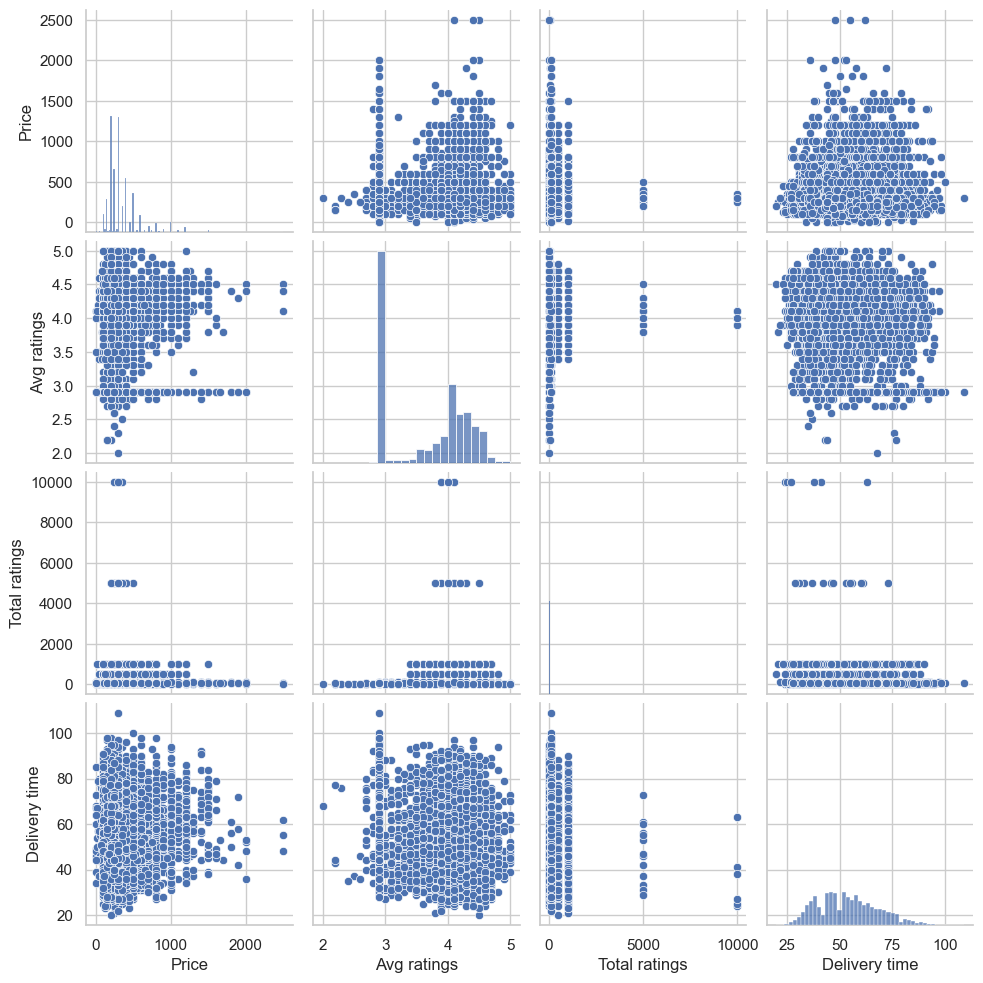

In [33]:
sns.pairplot(df[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']])
plt.show()

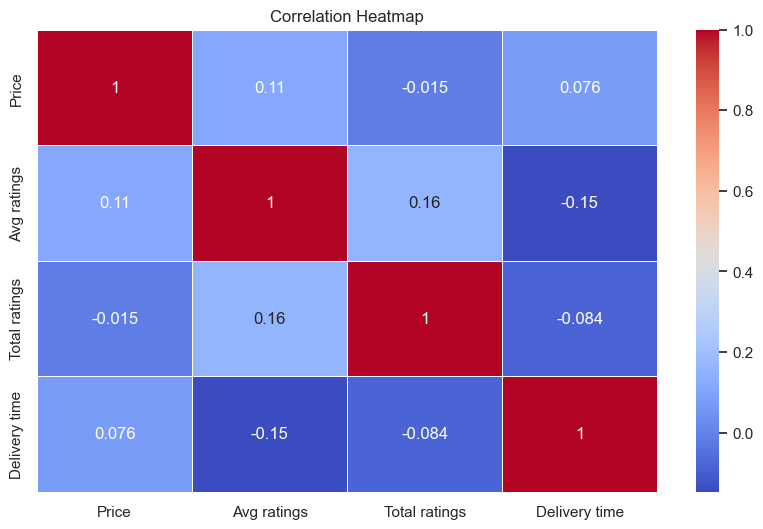

In [35]:
corr = df[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

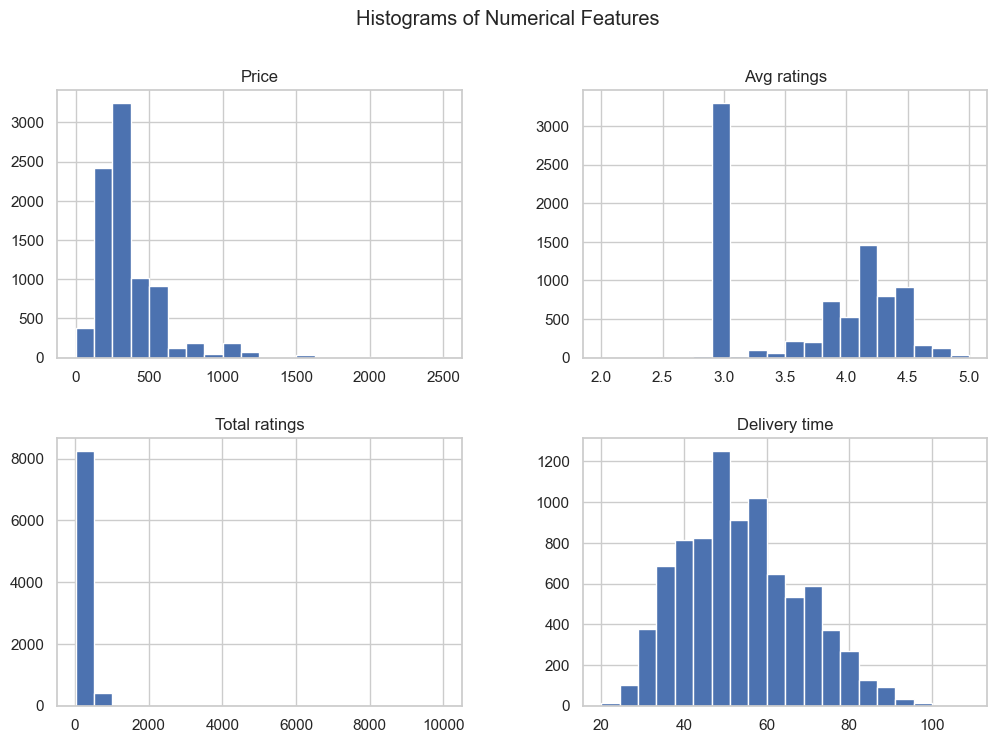

In [37]:
df[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

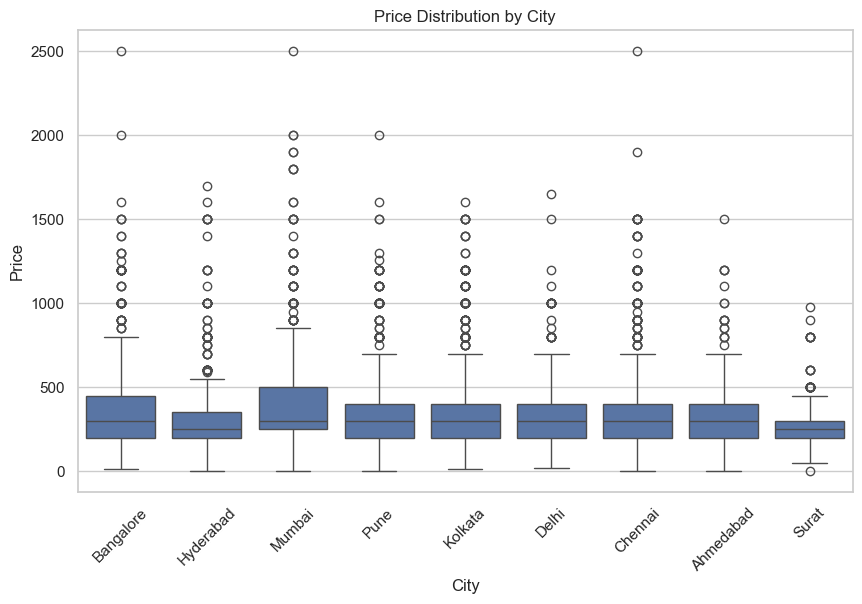

In [39]:
sns.boxplot(x='City', y='Price', data=df)
plt.title("Price Distribution by City")
plt.xticks(rotation=45)
plt.show()

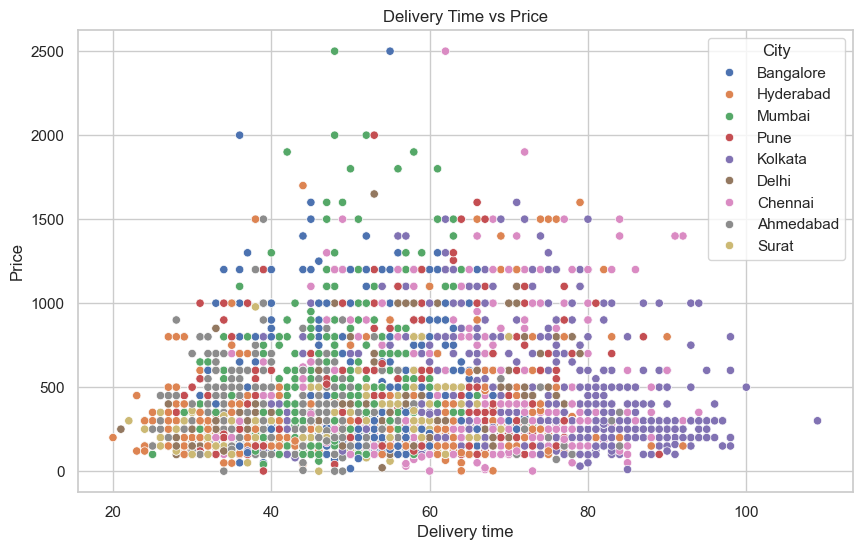

In [40]:
sns.scatterplot(x='Delivery time', y='Price', hue='City', data=df)
plt.title("Delivery Time vs Price")
plt.show()